<a href="https://colab.research.google.com/github/MonKhach/USA_housing_prices_regression/blob/main/housing_dataset_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
DATA_PATH = "data/USA Housing Dataset.csv"

Download the dataset from Kaggle and place it into data/

In [ ]:
housing_df = pd.read_csv(DATA_PATH)
housing_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014-05-10 00:00:00,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
6,2014-05-10 00:00:00,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,USA
7,2014-05-10 00:00:00,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent,WA 98031,USA
8,2014-05-10 00:00:00,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,5940 California Ave SW,Seattle,WA 98136,USA
9,2014-05-11 00:00:00,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,906 17th Ave,Seattle,WA 98122,USA


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [ ]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [ ]:
housing_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
housing_df['bathrooms']

,bathrooms
0,2.00
1,3.25
2,6.50
3,2.25
4,2.75
...,...
4135,1.75
4136,2.50
4137,2.50
4138,2.00


In [ ]:
housing_df['bedrooms']

,bedrooms
0,3.0
1,4.0
2,5.0
3,3.0
4,5.0
...,...
4135,3.0
4136,3.0
4137,3.0
4138,4.0


In [ ]:
housing_df['country']

,country
0,USA
1,USA
2,USA
3,USA
4,USA
...,...
4135,USA
4136,USA
4137,USA
4138,USA


In [ ]:
housing_df = housing_df.drop(columns=['country'])

In [ ]:
housing_df['city']

,city
0,Seattle
1,Carnation
2,Issaquah
3,Seattle
4,Seattle
...,...
4135,Seattle
4136,Bellevue
4137,Renton
4138,Seattle


In [ ]:
housing_df['street']

,street
0,9245-9249 Fremont Ave N
1,33001 NE 24th St
2,7070 270th Pl SE
3,820 NW 95th St
4,10834 31st Ave SW
...,...
4135,501 N 143rd St
4136,14855 SE 10th Pl
4137,759 Ilwaco Pl NE
4138,5148 S Creston St


In [ ]:
housing_df = housing_df.drop(columns=['street'])

In [ ]:
housing_df['date']

,date
0,2014-05-09 00:00:00
1,2014-05-09 00:00:00
2,2014-05-09 00:00:00
3,2014-05-09 00:00:00
4,2014-05-10 00:00:00
...,...
4135,2014-07-09 00:00:00
4136,2014-07-09 00:00:00
4137,2014-07-09 00:00:00
4138,2014-07-10 00:00:00


In [ ]:
housing_df['date'] = pd.to_datetime(housing_df['date'])
housing_df['Saleyear'] = housing_df['date'].dt.year
housing_df['Salemonth'] = housing_df['date'].dt.month
housing_df['Salequarter'] = housing_df['date'].dt.quarter
housing_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip',
       'Saleyear', 'Salemonth', 'Salequarter'],
      dtype='object')

In [ ]:
housing_df['yr_built']

,yr_built
0,2008
1,2007
2,2010
3,2007
4,1979
...,...
4135,1954
4136,1983
4137,2009
4138,1974


In [ ]:
housing_df['Saleyear']

,Saleyear
0,2014
1,2014
2,2014
3,2014
4,2014
...,...
4135,2014
4136,2014
4137,2014
4138,2014


In [ ]:
housing_df['AgeSale'] = housing_df['Saleyear'] - housing_df['yr_built']
housing_df['AgeSale']

,AgeSale
0,6
1,7
2,4
3,7
4,35
...,...
4135,60
4136,31
4137,5
4138,40


In [ ]:
housing_df['yr_renovated']

,yr_renovated
0,0
1,0
2,0
3,0
4,0
...,...
4135,1979
4136,2009
4137,0
4138,0


In [ ]:
housing_df["IsRenovated"] = (housing_df["yr_renovated"] > 0).astype(int)

In [ ]:
housing_df['IsRenovated']

,IsRenovated
0,0
1,0
2,0
3,0
4,0
...,...
4135,1
4136,1
4137,0
4138,0


In [ ]:
housing_df["AgeRenovated"] = (housing_df["Saleyear"] - housing_df["yr_renovated"]).where(
    housing_df["yr_renovated"] != 0,
    0
)
housing_df['AgeRenovated']

,AgeRenovated
0,0
1,0
2,0
3,0
4,0
...,...
4135,35
4136,5
4137,0
4138,0


In [ ]:
housing_df = housing_df[housing_df["price"] > 0]

In [ ]:
housing_df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Saleyear,Salemonth,Salequarter,AgeSale,IsRenovated,AgeRenovated
count,4091,4.091000e+03,4091.000000,4091.000000,4091.000000,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.0,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,2014-06-10 18:15:23.979467264,5.596872e+05,3.393547,2.156624,2135.931313,1.467661e+04,1.514300,0.006844,0.240039,3.449768,1825.789538,310.141775,1970.824737,808.316304,2014.0,5.843559,2.158396,43.175263,0.405280,7.917380
min,2014-05-02 00:00:00,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0,5.000000,2.000000,0.000000,0.000000,0.000000
25%,2014-05-27 00:00:00,3.250938e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0,5.000000,2.000000,17.000000,0.000000,0.000000
50%,2014-06-12 00:00:00,4.646000e+05,3.000000,2.250000,1980.000000,7.665000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000,2014.0,6.000000,2.000000,38.000000,0.000000,0.000000
75%,2014-06-25 00:00:00,6.600000e+05,4.000000,2.500000,2610.000000,1.095250e+04,2.000000,0.000000,0.000000,4.000000,2303.000000,600.000000,1997.000000,1999.000000,2014.0,6.000000,2.000000,63.000000,1.000000,11.000000
max,2014-07-10 00:00:00,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7680.000000,4820.000000,2014.000000,2014.000000,2014.0,7.000000,3.000000,114.000000,1.000000,102.000000
std,NaN,5.840060e+05,0.899115,0.776501,949.318839,3.596527e+04,0.535172,0.082457,0.776533,0.676252,852.802465,461.961346,29.840158,979.387848,0.0,0.669978,0.365157,29.840158,0.491006,16.591777


In [ ]:
housing_df["log_price"] = np.log(housing_df["price"])

<function matplotlib.pyplot.show(close=None, block=None)>

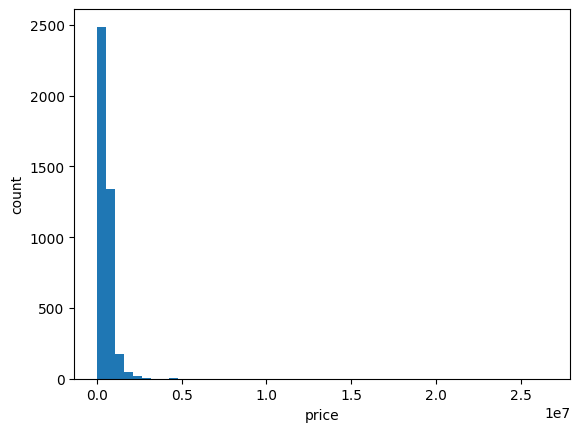

In [ ]:
plt.hist(housing_df['price'], bins=50)
plt.title = ('Price distribution')
plt.xlabel('price')
plt.ylabel('count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

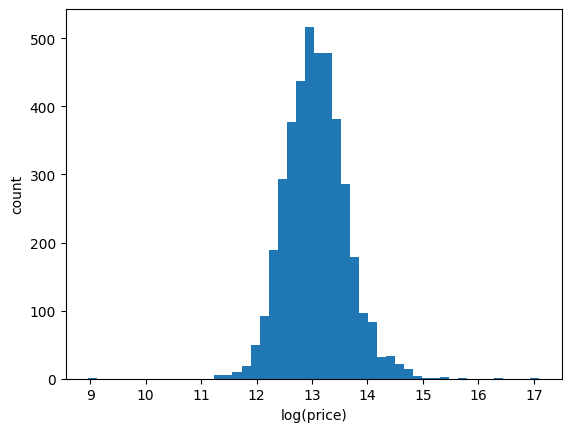

In [ ]:
plt.hist(housing_df['log_price'], bins=50)
plt.title = ('Log Price distribution')
plt.xlabel('log(price)')
plt.ylabel('count')
plt.show

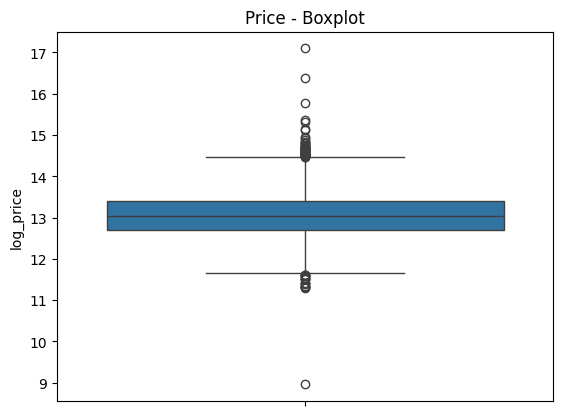

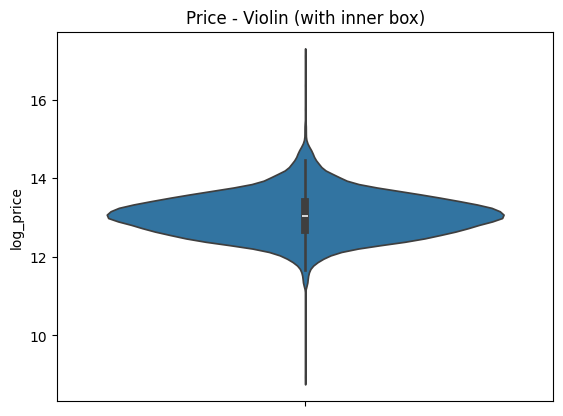

In [ ]:
plt.figure()
sns.boxplot(y=housing_df['log_price'])
plt.title("Price - Boxplot")
plt.show()

plt.figure()
sns.violinplot(y=housing_df['log_price'], inner="box")
plt.title("Price - Violin (with inner box)")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(
    housing_df,
    x='sqft_living',
    y='log_price',
    trendline="ols",
    title=f"{'sqft_living'} vs {'log_price'} (with OLS trendline)",
    opacity=0.6
)
fig.show()

In [ ]:
for cat_col, label in [('bedrooms', "Bedrooms"), ('bathrooms', "Bathrooms"), ('floors', "Floors")]:
    if cat_col is None:
        continue
    d = housing_df[[cat_col, 'log_price']].dropna()
    fig = px.box(d, x=cat_col, y='log_price', points="outliers",
                 title=f"Price by {label} (Boxplot)")
    fig.show()

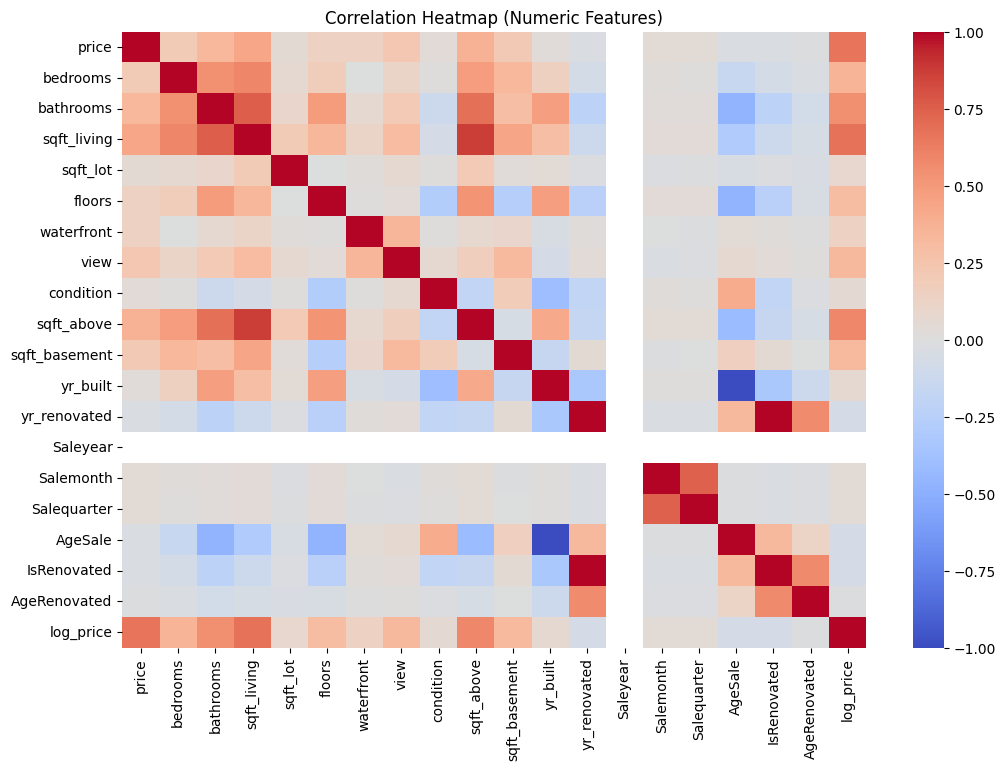

In [ ]:
num_df = housing_df.select_dtypes(include=[np.number]).dropna(axis=0, how="any")
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
num_df = housing_df.select_dtypes(include=[np.number])
corr_with_price = num_df.corr(numeric_only=True)['log_price'].sort_values(ascending=False)

print("Top positive correlations with price:")
print(corr_with_price.head(10))

print("\nTop negative correlations with price:")
print(corr_with_price.tail(10))

Top positive correlations with price:
log_price        1.000000
sqft_living      0.675380
price            0.667697
sqft_above       0.582162
bathrooms        0.552454
bedrooms         0.352139
view             0.321686
sqft_basement    0.313190
floors           0.303479
waterfront       0.140773
Name: log_price, dtype: float64

Top negative correlations with price:
sqft_lot        0.082780
yr_built        0.067384
condition       0.056477
Salemonth       0.045672
Salequarter     0.040695
AgeRenovated   -0.011648
IsRenovated    -0.063875
yr_renovated   -0.064297
AgeSale        -0.067384
Saleyear             NaN
Name: log_price, dtype: float64


In [ ]:
housing_df.sort_values(by='date')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,city,statezip,Saleyear,Salemonth,Salequarter,AgeSale,IsRenovated,AgeRenovated,log_price
3849,2014-05-02,436110.000000,3.0,2.50,1770,1235,3.0,0,0,3,...,0,Seattle,WA 98103,2014,5,2,7,0,0,12.985650
3879,2014-05-02,440000.000000,4.0,2.25,2160,8119,1.0,0,0,3,...,1913,Bellevue,WA 98006,2014,5,2,48,1,101,12.994530
3892,2014-05-02,237227.857143,4.0,2.50,2200,9397,2.0,0,0,3,...,2000,Auburn,WA 98001,2014,5,2,27,1,14,12.376776
3895,2014-05-05,744312.500000,4.0,2.50,2800,5900,1.0,0,0,3,...,2008,Seattle,WA 98115,2014,5,2,51,1,6,13.520216
3893,2014-05-05,117833.333333,3.0,1.00,1340,306848,1.0,0,0,3,...,0,Duvall,WA 98019,2014,5,2,61,0,0,11.677026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,2014-07-10,840000.000000,4.0,3.50,3840,85728,2.0,0,0,3,...,2006,Carnation,WA 98014,2014,7,3,16,1,8,13.641157
3847,2014-07-10,657500.000000,3.0,2.00,2320,10960,1.0,0,0,3,...,2001,Bellevue,WA 98005,2014,7,3,58,1,13,13.396200
3848,2014-07-10,850000.000000,5.0,2.00,2310,13430,1.5,0,0,4,...,0,Bellevue,WA 98004,2014,7,3,48,0,0,13.652992
4138,2014-07-10,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,...,0,Seattle,WA 98178,2014,7,3,40,0,0,12.222930


In [ ]:
y = housing_df['log_price']
X = housing_df.drop(columns=['price', 'log_price', 'date'])

In [ ]:
print(y.shape)
print(X.shape)

(4091,)
(4091, 20)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1764706, shuffle=False)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 4139
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4091 non-null   datetime64[ns]
 1   price          4091 non-null   float64       
 2   bedrooms       4091 non-null   float64       
 3   bathrooms      4091 non-null   float64       
 4   sqft_living    4091 non-null   int64         
 5   sqft_lot       4091 non-null   int64         
 6   floors         4091 non-null   float64       
 7   waterfront     4091 non-null   int64         
 8   view           4091 non-null   int64         
 9   condition      4091 non-null   int64         
 10  sqft_above     4091 non-null   int64         
 11  sqft_basement  4091 non-null   int64         
 12  yr_built       4091 non-null   int64         
 13  yr_renovated   4091 non-null   int64         
 14  city           4091 non-null   object        
 15  statezip       4091 non-nu

In [ ]:
X_train.isna().any().any()

np.False_

In [ ]:
y_train.isna().any().any()

np.False_

In [ ]:
X_val.isna().any().any()

np.False_

In [ ]:
X_test.isna().any().any()

np.False_

In [ ]:
X_train[['city', 'statezip']].dtypes

,0
city,object
statezip,object


In [ ]:
cat_col = ['city', 'statezip']
num_col = [c for c in X_train.columns if c not in cat_col]
preprocess = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),cat_col), ("num", "passthrough", num_col),])

In [ ]:
preprocess.fit(X_train)

X_train_enc = preprocess.transform(X_train)
X_val_enc   = preprocess.transform(X_val)
X_test_enc  = preprocess.transform(X_test)

In [ ]:
X_train_enc.shape, X_val_enc.shape, X_test_enc.shape

((2863, 136), (614, 136), (614, 136))

In [ ]:
lr = LinearRegression()
lr.fit(X_train_enc, y_train)

pred_val_log  = lr.predict(X_val_enc)
pred_test_log = lr.predict(X_test_enc)

rmse_val_log = np.sqrt(mean_squared_error(y_val, pred_val_log))
mae_val_log  = mean_absolute_error(y_val, pred_val_log)

rmse_test_log = np.sqrt(mean_squared_error(y_test, pred_test_log))
mae_test_log  = mean_absolute_error(y_test, pred_test_log)

print("VAL  (log): RMSE =", rmse_val_log, " MAE =", mae_val_log)
print("TEST (log): RMSE =", rmse_test_log, " MAE =", mae_test_log)

val_actual_price  = np.exp(y_val)
val_pred_price    = np.exp(pred_val_log)
test_actual_price = np.exp(y_test)
test_pred_price   = np.exp(pred_test_log)

rmse_val_usd = np.sqrt(mean_squared_error(val_actual_price, val_pred_price))
mae_val_usd  = mean_absolute_error(val_actual_price, val_pred_price)

rmse_test_usd = np.sqrt(mean_squared_error(test_actual_price, test_pred_price))
mae_test_usd  = mean_absolute_error(test_actual_price, test_pred_price)

print("VAL  (USD): RMSE =", rmse_val_usd, " MAE =", mae_val_usd)
print("TEST (USD): RMSE =", rmse_test_usd, " MAE =", mae_test_usd)

VAL  (log): RMSE = 0.24905278050419688  MAE = 0.1834540583823587
TEST (log): RMSE = 0.471086488188746  MAE = 0.27233165136076787
VAL  (USD): RMSE = 201731.71490690464  MAE = 113170.79503358247
TEST (USD): RMSE = 1205749.0118584055  MAE = 202697.25621941074


In [ ]:
X_train_enc = X_train_enc.toarray()
X_val_enc   = X_val_enc.toarray()
X_test_enc  = X_test_enc.toarray()